# Import the Data

In [1]:
# Importing libraries needed throughout the notebook

import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import the data from a local csv file

data = pd.read_csv("framingham.csv")
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Clean Up the Data

In [2]:
# Renaming the attributes to be more visually appealing

data = data.rename(columns={"male":"Male",
                     "age":"Age",
                     "education":"Education",
                     "currentSmoker":"Smoker",
                     "cigsPerDay":"CigarettesPerDay",
                     "BPMeds":"BloodPressureMeds",
                     "prevalentStroke":"Stroke",
                     "prevalentHyp":"Hypertension",
                     "diabetes":"Diabetes",
                     "totChol":"TotalCholesterol",
                     "sysBP":"SystolicPressure",
                     "diaBP":"DiastolicPressure",
                     "BMI":"BodyMassIndex",
                     "heartRate":"HeartRate",
                     "glucose":"Glucose",
                     "TenYearCHD":"HeartDisease"})

In [3]:
# Check for missing data

data.isna().sum()

Male                   0
Age                    0
Education            105
Smoker                 0
CigarettesPerDay      29
BloodPressureMeds     53
Stroke                 0
Hypertension           0
Diabetes               0
TotalCholesterol      50
SystolicPressure       0
DiastolicPressure      0
BodyMassIndex         19
HeartRate              1
Glucose              388
HeartDisease           0
dtype: int64

In [4]:
# Remove medically irrelevant attribute "Education"

data = data.drop(columns=["Education"])
data

,Male,Age,Smoker,CigarettesPerDay,BloodPressureMeds,Stroke,Hypertension,Diabetes,TotalCholesterol,SystolicPressure,DiastolicPressure,BodyMassIndex,HeartRate,Glucose,HeartDisease
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
# Fill in rest of missing data

# Checked the table to ensure all missing data only belonged to non-smokers
data["CigarettesPerDay"].fillna(0, inplace=True)

# Insert a statistical average for the missing values
data["TotalCholesterol"].fillna(data["TotalCholesterol"].mean().round(decimals=0), inplace=True)

# Insert an average for BMI as well
data["BodyMassIndex"].fillna(data["BodyMassIndex"].mean().round(decimals=2), inplace=True)

# Insert an average for Heart Rate
data["HeartRate"].fillna(data["HeartRate"].mean(), inplace=True)

data.isna().sum()

Male                   0
Age                    0
Smoker                 0
CigarettesPerDay       0
BloodPressureMeds     53
Stroke                 0
Hypertension           0
Diabetes               0
TotalCholesterol       0
SystolicPressure       0
DiastolicPressure      0
BodyMassIndex          0
HeartRate              0
Glucose              388
HeartDisease           0
dtype: int64

In [6]:
# Blood Pressure Meds contains missing data for both people with and without hypertension
# Glucose missing data entries are too numerious. Filling in with an average might negatively impact the accuracy of the model
# Just drop these entries altogether to be on the safe side

data = data.dropna()
data.isna().sum()

Male                 0
Age                  0
Smoker               0
CigarettesPerDay     0
BloodPressureMeds    0
Stroke               0
Hypertension         0
Diabetes             0
TotalCholesterol     0
SystolicPressure     0
DiastolicPressure    0
BodyMassIndex        0
HeartRate            0
Glucose              0
HeartDisease         0
dtype: int64

In [7]:
# A sample size of 3801 with complete data will work well for training the model
# Reset the index to line up with the remaining number of rows

data.reset_index(drop=True, inplace=True)
data

,Male,Age,Smoker,CigarettesPerDay,BloodPressureMeds,Stroke,Hypertension,Diabetes,TotalCholesterol,SystolicPressure,DiastolicPressure,BodyMassIndex,HeartRate,Glucose,HeartDisease
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3797,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
3798,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
3799,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [8]:
# Export the data as a new csv for use in the application

data.to_csv("framingham_filled.csv", index=False)

# Data Analysis with Visualizations

True


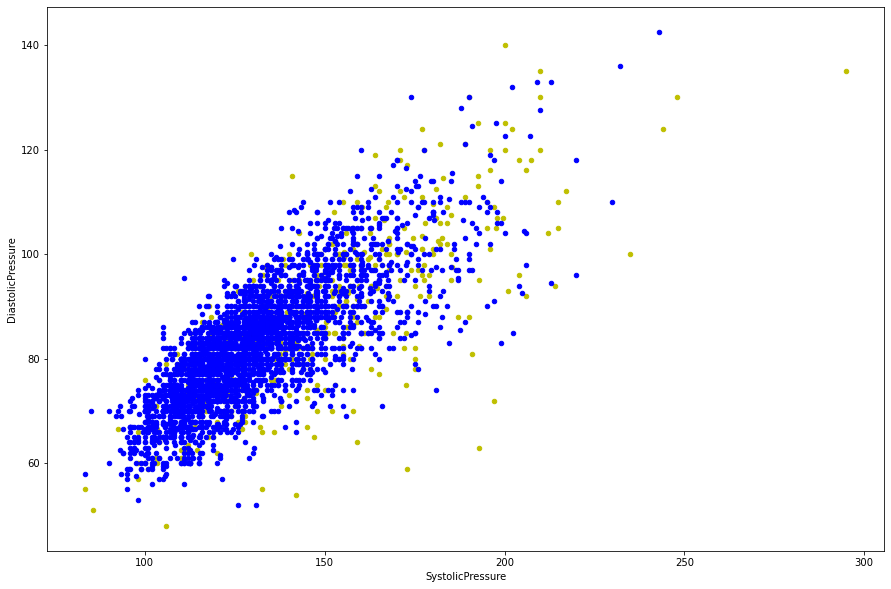

In [43]:
# Relation between Blood Pressure and Heart Disease

# First, we will create two datasets. One for those with heart disease and one for those without

data_hd = pd.read_csv("framingham_filled.csv")
data_nhd = pd.read_csv("framingham_filled.csv")

data_hd = data_hd.drop(data_hd[data_hd.HeartDisease == 0].index)
data_nhd = data_nhd.drop(data_nhd[data_nhd.HeartDisease == 1].index)

# Second, we create a scatter plot to show this relation

ax1 = data_hd.plot(kind='scatter', x='SystolicPressure', y='DiastolicPressure', color='y', figsize=(15,10))
ax2 = data_nhd.plot(kind='scatter', x='SystolicPressure', y='DiastolicPressure', color='b', ax=ax1)

print(ax1 == ax2)

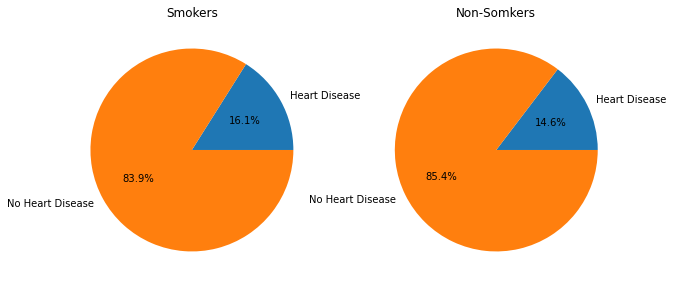

In [82]:
# Relation between smoking and heart disease

smokers = data.drop(data[data.Smoker == 0].index)
nonsmokers = data.drop(data[data.Smoker == 1].index)

smokers_hd = data_hd.drop(data_hd[data_hd.Smoker == 0].index)
smokers_nhd = data_nhd.drop(data_nhd[data_nhd.Smoker == 0].index)
nonsmokers_hd = data_hd.drop(data_hd[data_hd.Smoker == 1].index)
nonsmokers_nhd = data_nhd.drop(data_nhd[data_nhd.Smoker == 1].index)

sizes_smokers = [smokers_hd['Smoker'].sum(), smokers_nhd['Smoker'].sum()]
sizes_nonsmokers = [nonsmokers_hd['HeartDisease'].sum(), len(nonsmokers_nhd)]
labels = "Heart Disease", "No Heart Disease"

fig1, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.pie(sizes_smokers, labels=labels, autopct='%1.1f%%')
ax1.set_title("Smokers")
ax2.pie(sizes_nonsmokers, labels=labels, autopct='%1.1f%%')
ax2.set_title("Non-Somkers")
plt.show()

True


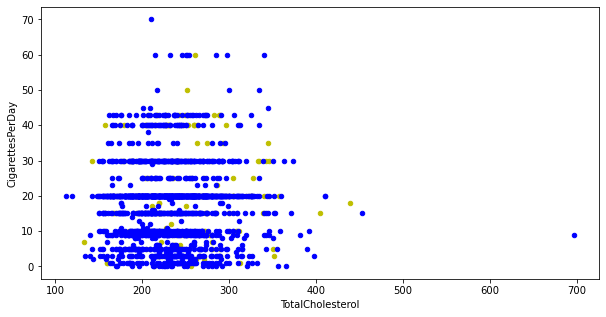

In [89]:
# Relation between cigarettes per day, cholesterol levels, and heart disease

ax1 = smokers_hd.plot(kind='scatter', x='TotalCholesterol', y='CigarettesPerDay', color='y', figsize=(10,5))
ax2 = smokers_nhd.plot(kind='scatter', x='TotalCholesterol', y='CigarettesPerDay', color='b', ax=ax1)

print(ax1 == ax2)

<AxesSubplot:ylabel='Frequency'>

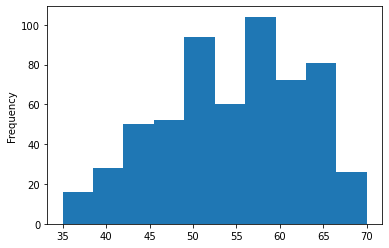

In [104]:
# Relation between age and heart disease

heart_disease = data.drop(data[data.HeartDisease == 0].index)
heart_disease["Age"].plot.hist()

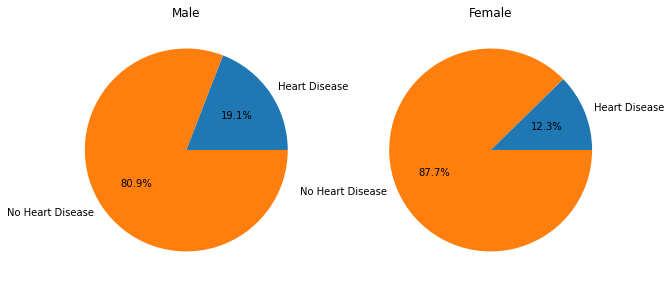

In [102]:
# Relation between sex and heart disease

male = data.drop(data[data.Male == 0].index)
female = data.drop(data[data.Male == 1].index)

sizes_male = [male["HeartDisease"].sum(), (len(male) - male["HeartDisease"].sum())]
sizes_female = [female["HeartDisease"].sum(), (len(female) - female["HeartDisease"].sum())]
labels = ["Heart Disease", "No Heart Disease"]

fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.pie(sizes_male, labels=labels, autopct='%1.1f%%')
ax1.set_title("Male")
ax2.pie(sizes_female, labels=labels, autopct='%1.1f%%')
ax2.set_title("Female")
plt.show()

# Training and Testing a Classification Model

In [171]:
# Splitting the data into a training and testing set for the model and then fitting the model with the training set

data_model = RandomForestClassifier()
np.random.seed(9)

x = data.drop("HeartDisease", axis=1)
y = data["HeartDisease"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
data_model.fit(x_train, y_train)

RandomForestClassifier()

In [172]:
# Testing the model

data_model.score(x_test, y_test)

0.8515111695137977

In [11]:
# Exporting the model for use in the application

import pickle

pickle.dump(data_model, open("heart_disease_model.pk1", "wb"))